In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Operator, Statevector

import numpy as np

# from qsvt.algorithms import linear_solver
from qsvt.algorithms_beta import linear_solver
import time


# matrix size exponent
N = 1

In [2]:
# # Generate a random circulant matrix.
# np.random.seed(0)
def circulant_matrix(N):
    a = [np.random.random() for _ in range(2 ** N)]
    for i in range(2 ** N):
        k = np.random.random()
        if k > 0.5: 
            a[i] *= -1
    # print(a)

    A = []
    for _ in range(2 ** N):
        A.append(a.copy())
        k = a.pop(0)
        a.append(k)

    A = np.array(A)
    # kappa = np.linalg.cond(A)
    return A

def sparse_matrix(A, d):
    L = len(A)
    zero_num = L - d
    for i in range(L):
        zero_pos = np.random.choice(range(L), zero_num)
        for j in zero_pos:
            A[i, j] = 0
    return A

def gen_random_matrix(kappa_upper, d):
    while True:
        A = circulant_matrix(N)
        d = min(d, 2**N)
        A = sparse_matrix(A, d)

        kappa = np.linalg.cond(A)
        print(f'kappa: {kappa}')
        if kappa <= kappa_upper: 
            return A
        
A = gen_random_matrix(50-1e-9, 2**(N))
print(A)

kappa: 13.176935136196338
[[ 0.46293975 -0.53897527]
 [-0.53897527  0.46293975]]


In [3]:
# 16 * 16
# A = np.[[0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333], [0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133], [0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484], [0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615], [0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227], [0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885], [0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117], [0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631], [0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816], [0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081], [0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739], [0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805], [0.6849054170543225, 0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582], [0.5437824898334759, 0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225], [0.23208190595437173, 0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759], [0.77368360476333, 0.490648203407133, 0.2186134761020484, 0.12664679799037615, 0.20935261189478227, 0.18183374301837885, 0.18596569631386117, 0.5921672771247631, 0.9183885704786816, 0.2765242687174081, 0.6526777537113739, 0.33094133497910805, 0.5486557161590582, 0.6849054170543225, 0.5437824898334759, 0.23208190595437173]])

In [4]:
# A = np.array([
#     [1, -1/3],
#     [-1/3, 1]
# ])

# A = np.array([
#      [1, 2, 3, 4],
#      [4, 1, 2, 3],
#      [3, 4, 1, 2],
#      [2, 3, 4, 1]]
# , dtype=float)

# A = np.array([
#     [1, 2, 3, 4, 5, 6, 7, 8],
#     [2, 3, 4, 5, 6, 7, 8, 1],
#     [3, 4, 5, 6, 7, 8, 1, 2],
#     [4, 5, 6, 7, 8, 1, 2, 3],
#     [5, 6, 7, 8, 1, 2, 3, 4],
#     [6, 7, 8, 1, 2, 3, 4, 5],
#     [7, 8, 1, 2, 3, 4, 5, 6],
#     [8, 1, 2, 3, 4, 5, 6, 7]
# ], dtype=float)


A_norm = np.linalg.norm(A)
# print(f'A norm: {A_norm}')
A /= A_norm

# print(f'A:\n{A}')
kappa = np.linalg.cond(A)
print(f'kappa: {kappa}')

W, S, Vd = np.linalg.svd(A)
# print(f'SVD of normalized A:\n\tW:\n{W}\n\tS:\n{S}\n\tVd:\n{Vd}')

st = time.time()
# qc = linear_solver(A)
# qc = linear_solver(A, eps=0.01, set_kappa=True)
# qc = linear_solver(A, set_kappa=True)
qc = linear_solver(A, set_kappa=True, amplify='AA')
# qc = linear_solver(A, set_kappa=True, amplify='sign')
# qc = linear_solver(A, amplify='sign')
# qc = linear_solver(A, real_only=False)
# qc = linear_solver(A, amplify='chebyshev')
# qc = linear_solver(A, amplify='sign')
# qc = linear_solver(A, amplify='AA')
ed = time.time()
print(f'prepare circuit spends: {ed - st} sec')

# print(f'circuit depth: {qc.depth()}')
# qc.draw('mpl')

kappa: 13.17693513619632
deg: 121
QSVT spends: 0.016881465911865234 sec
prepare circuit spends: 0.047734737396240234 sec


In [5]:
st = time.time()
state = Statevector(qc)
ed = time.time()
print(f'prepare state snapshot spends: {ed - st} sec')

n = qc.num_qubits
print(f'number of qubits: {n}')

# for AA
measure_qubits = [n - 3, n - 2]
exp_outcome = "00"

# for no AA
# measure_qubits = [n - 2, n - 1]
# exp_outcome = "00"

# for no AA and no real_only
# measure_qubits = [n - 1]
# exp_outcome = "0"

st = time.time()
while True:
    outcome, mstate = state.measure(measure_qubits)
    if outcome == exp_outcome: break
ed = time.time()
print(f'post-measurement state: {mstate}')
print(f'post-selection spends: {ed - st} sec')

############## solve by singular values ################
# fS = 1 / S
# print(f'fS: {fS}')

# fAd = np.conj(Vd.T) * fS @ np.conj(W.T) # A^\dagger
# print(f'fAd: {fAd}')


# res = np.array(fAd[:, 0])
########################################################

# for AA: 3 ancilla qubits
res = np.linalg.solve(A, np.array([1] + [0] * (2 ** (n - 3) - 1)))

# for no AA: 2 ancilla qubits
# res = np.linalg.solve(A, np.array([1] + [0] * (2 ** (n - 2) - 1)))

# for no AA and no real_only: 1 ancilla qubits
# res = np.linalg.solve(A, np.array([1] + [0] * (2 ** (n - 1) - 1)))

res /= np.linalg.norm(res)
print(f'res: {res}')
# print(f'res: {res / np.linalg.norm(res)}')

prepare state snapshot spends: 0.7916312217712402 sec
number of qubits: 4
post-measurement state: Statevector([-0.13744896+0.6181738j , -0.16797884+0.75548133j,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2, 2))
post-selection spends: 0.0006392002105712891 sec
res: [-0.65157071 -0.7585879 ]


In [6]:
# Calculate total variance
from qsvt.helper import total_variation

P = np.array([mstate[i] for i in range(2 ** N)])
P = np.array([np.linalg.norm(x)**2 for x in P])
print(f'P: {P}')
# res = [-0.63012604,  0.070014,    0.070014,    0.77015405]
Q = np.array([x ** 2 for x in res])
print(f'Q: {Q}')

print(f'kappa: {kappa}')
print(f'total_variation (exact): {total_variation(P, Q)}')

P: [0.40103106 0.59896894]
Q: [0.42454439 0.57545561]
kappa: 13.17693513619632
total_variation (exact): 0.023513327558174563


qc depth: 267
transpilation spends: 3.63456654548645 sec
transpiled qc depth: 29951
run job spends: 0.09910082817077637 sec


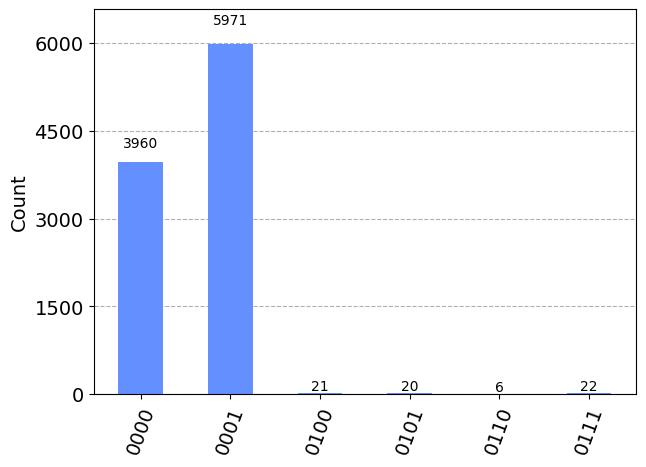

In [7]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# cr = ClassicalRegister(len(measure_qubits))
# qc.add_register(cr)
# qc.measure(measure_qubits, cr)
qc.measure_all()
print(f'qc depth: {qc.depth()}')

# It seems that even if 'GPU' is specified, GPU is not used at all.
# Since QSVT involves large multi-qubit gates (block-encoding), "extended_stabilizer" is not efficient.
# sim = AerSimulator(method='extended_stabilizer')
sim = AerSimulator(method='statevector')
# sim = AerSimulator(method='statevector', device='GPU')

st = time.time()
transpiled_circuit = transpile(qc, sim)
# transpiled_circuit = transpile(qc, sim, optimization_level=3)
ed = time.time()
print(f'transpilation spends: {ed - st} sec')
# transpiled_circuit = transpile(qc, sim, optimization_level=3)
print(f'transpiled qc depth: {transpiled_circuit.depth()}')


# run job
shots = 10000
st = time.time()
job = sim.run(transpiled_circuit, shots=shots, dynamic=True, blocking_enable=True, blocking_qubits=10)
ed = time.time()

print(f'run job spends: {ed - st} sec')
# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

In [8]:
# Calculate total variance
from qsvt.helper import total_variation

# experiment count
print(f'exp_counts: {exp_counts}')
valid_count = np.zeros(shape=(2 ** N))
for data in exp_counts:
    # print(f'data: {data[:]}')
    if data[:2] == '00':
        # print(int(data[2:], base=2))
        valid_count[int(data[2:], base=2)] = exp_counts[data]
valid_count /= shots
valid_count /= np.linalg.norm(valid_count)
print(f'valid_count: {valid_count}')

Q = np.array([x ** 2 for x in res])
print(f'Q: {Q}')

print(f'kappa: {kappa}')
print(f'total_variation (exp): {total_variation(valid_count, Q)}')

exp_counts: {'0110': 6, '0100': 21, '0101': 20, '0111': 22, '0001': 5971, '0000': 3960}
valid_count: [0.55270166 0.83337919]
Q: [0.42454439 0.57545561]
kappa: 13.17693513619632
total_variation (exp): 0.19304042486423395


In [9]:
# # Sampler  (slow and "quasi")
# from qiskit.circuit.random import random_circuit 
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler 

# service = QiskitRuntimeService() 

# # Run on a simulator
# backend = service.get_backend("ibmq_qasm_simulator")
# # Or use the next line if you want to run on a system instead of a simulator:
# # backend = service.least_busy(simulator=False)

# # circuit = random_circuit(2, 2, seed=1234) 
# # circuit.measure_all() 

# sampler = Sampler(backend) 
# job = sampler.run(qc) 
# result = job.result() 

# print(qc) 
# print(f" > Quasi probability distribution: {result.quasi_dists}") 
# print(f" > Metadata: {result.metadata}") 



In [10]:
# # remote backend
# from qiskit_ibm_provider import IBMProvider

# hub="ibm-q"; group="open"; project="main"

# # token = 'dc8930d1f18fc7649c1b976a87c9d7f7cf49c1a2db48bcbd34e30245c4e492faafe52f974835e4a6122c03f14b4db02ce2fab9a87b35dc8ebaca2fb408e6aa1a'
# # IBMProvider.save_account(token)

# provider = IBMProvider()
# # This doesn't work
# # backend_name = "simulator_extended_stabilizer" 
# backend_name = "simulator_statevector"
# # backend_name = "ibm_perth"
# provider_backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")
# print(provider_backend.name)

In [11]:
# # run job remotely
# shots = 10000
# st = time.time()
# transpiled_circuit = transpile(qc, provider_backend)
# # transpiled_circuit = transpile(qc, provider_backend, optimization_level=3)
# ed = time.time()
# print(f'transpilation spends: {ed - st} sec')
# print(f'transpiled qc depth: {transpiled_circuit.depth()}')

# # job = provider_backend.run(transpiled_circuit, shots=shots)
# job = provider_backend.run(qc, shots=shots)

# print('job submitted!')

# # Get the results and display them
# exp_result = job.result()
# exp_counts = exp_result.get_counts()
# plot_histogram(exp_counts)

In [12]:
# # basis gates
# aer_config = sim.configuration()
# aer_basis_gates = aer_config.basis_gates
# print(len(aer_basis_gates))

# config = provider_backend.configuration()
# basis_gates = config.basis_gates
# print(len(basis_gates))

# aer_basis_gates.sort()
# basis_gates.sort()
# print(aer_basis_gates)
# print(basis_gates)

# for gate in basis_gates:
#     if gate not in aer_basis_gates:
#         print(f'{gate} not in aerSim')
# for gate in aer_basis_gates:
#     if gate not in basis_gates:
#         print(f'"{gate}" not in Sim')